<a href="https://colab.research.google.com/github/zahra-sharifzadeh/Digital_Audio_Processing/blob/main/Digital_Audio_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Downloading Data


In [1]:
# Download the wavefile
!wget https://github.com/GuitarsAI/BDASPML/raw/main/audio/tone440_48k.wav

--2023-05-19 09:09:29--  https://github.com/GuitarsAI/BDASPML/raw/main/audio/tone440_48k.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GuitarsAI/BDASPML/main/audio/tone440_48k.wav [following]
--2023-05-19 09:09:29--  https://raw.githubusercontent.com/GuitarsAI/BDASPML/main/audio/tone440_48k.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96044 (94K) [audio/wav]
Saving to: ‘tone440_48k.wav’

tone440_48k.wav     100%[===================>]  93.79K  --.-KB/s    in 0.01s   

2023-05-19 09:09:29 (6.61 MB/s) - ‘tone440_48k.wav’ saved [96044/96044]



# 01. Load and Playback a .wav File

In [2]:
import librosa

In [3]:
wav_file_path = "/content/tone440_48k.wav"
audio_data, sample_rate = librosa.load(wav_file_path, sr=None) # loading wave file with original sample rate

In [4]:
print("Audio data:", audio_data)
print("Sample Rate:", sample_rate)

Audio data: [ 0.          0.05755615  0.1149292  ... -0.17193604 -0.11495972
 -0.05758667]
Sample Rate: 48000


In [5]:
import IPython.display as ipd

ipd.Audio(audio_data, rate=sample_rate)

**Sampleing**: convertingan Analong to Digital signal


---
**Quantization**:the process of mapping input values from a large set (often a continuous set) to output values in a (countable) smaller set, often with a finite number of elements



---

fs = 1/T

**fs**: sampling frequency(number of sample in one second.)

**T**: sampling period 


In [10]:
type(audio_data)

numpy.ndarray

In [6]:
# ipd?

In [8]:
def cal_T(sampling_rate):
  return 1/sampling_rate

In [9]:
sampling_period = cal_T(16000)
type(sampling_period)

float

# 02. load (Scipy) and plot a .wav File

In [11]:
from scipy.io import wavfile

In [12]:
sample_rate_scipy,  data = wavfile.read(wav_file_path) 

In [13]:
print("Sample Rate:",sample_rate_scipy )
print(f"data size: {data.size}")
print(f"data length:{data.shape[0]/sample_rate_scipy:.2f}s")
print(f"data:{data}")

Sample Rate: 48000
data size: 48000
data length:1.00s
data:[    0  1886  3766 ... -5634 -3767 -1887]


In [14]:
print(f"data max value: {data.max()} and data min value is : {data.min()}.")

data max value: 32767 and data min value is : -32768.


In [15]:
import matplotlib.pyplot as plt


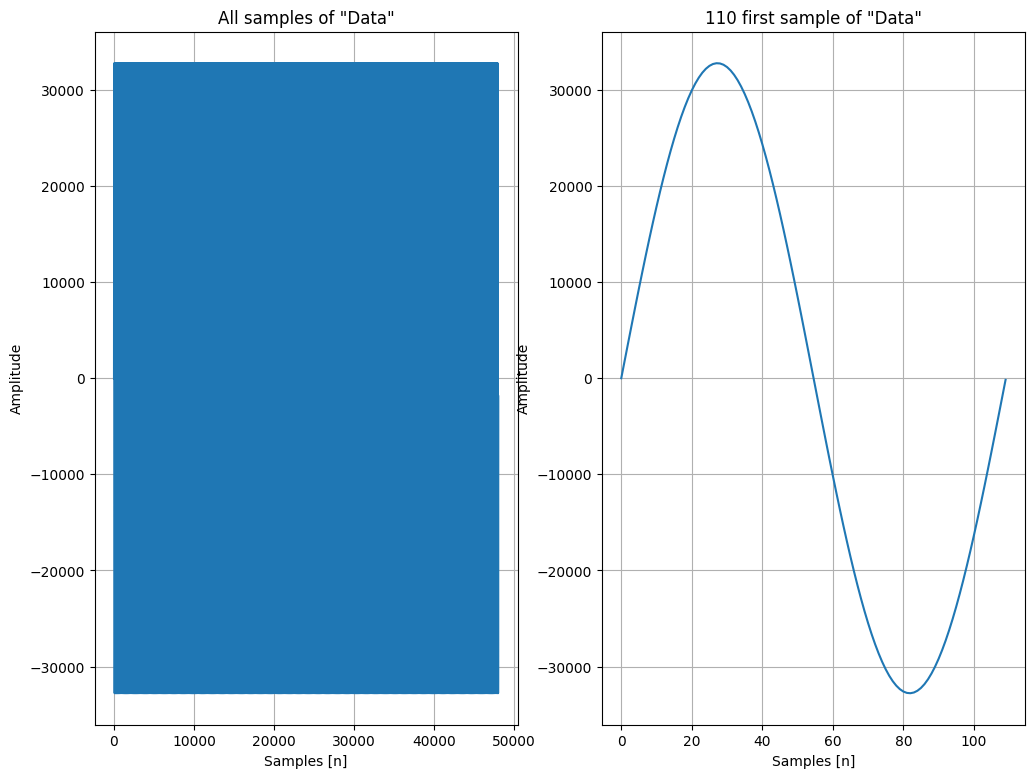

In [17]:
plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.title("All samples of \"Data\"")
plt.ylabel("Amplitude")
plt.xlabel("Samples [n]")
plt.plot(data)
plt.grid()


plt.subplot(1, 2, 2)
plt.title("110 first sample of \"Data\"")
plt.ylabel("Amplitude")
plt.xlabel("Samples [n]")
plt.plot(data[:110])
plt.grid()

# 03. torchaudio

In [20]:
import torchaudio

In [21]:
waveform, sample_rate = torchaudio.load(wav_file_path)